In [51]:
import numpy as np
%matplotlib notebook
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
react=[]
with open('react.txt.normalized', 'r') as f:
    for line in f:
        react.append(line.strip().split(' '))
spring=[]
with open('spring.net.txt.normalized', 'r') as f:
    for line in f:
        spring.append(line.strip().split(' '))
git=[]
with open('git.txt.normalized', 'r') as f:
    for line in f:
        git.append(line.strip().split(' '))
scipy=[]
with open('scipy.txt.normalized', 'r') as f:
    for line in f:
        scipy.append(line.strip().split(' '))

In [101]:
class SymbStat:
    non_alpha_len=32
    def __init__(self, stat_table):
        self.header=stat_table[0]
        self.count=[]
        self.freq=[]
        self.symbs=[]
        for row in stat_table[1:]:
            self.count.append(row[0])
            self.freq.append(row[1])
            self.symbs.append(row[2])
        self.freq = np.array(self.freq)
        self.count = np.array(self.count)
        self.np_symbs = np.array(self.symbs)
        self.non_alphas = np.array(self.symbs[:SymbStat.non_alpha_len])
        self.non_alphas_freq = np.array(self.freq[:SymbStat.non_alpha_len],dtype='float')
        self.sorted_non_alphas = self.non_alphas[np.argsort(self.non_alphas_freq)]
        self.sorted_non_alphas_freq = self.non_alphas_freq[np.argsort(self.non_alphas_freq)]
    def sorted_position(self, symb):
        return np.where(self.sorted_non_alphas == symb)[0][0]
        

In [102]:
react_stats = SymbStat(react)
spring_stats = SymbStat(spring)
git_stats = SymbStat(git)
scipy_stats = SymbStat(scipy)

In [78]:
scipy_stats.symbs == git_stats.symbs == spring_stats.symbs == react_stats.symbs

True

In [112]:
symbols=set(scipy_stats.symbs[:32])

<IPython.core.display.Javascript object>


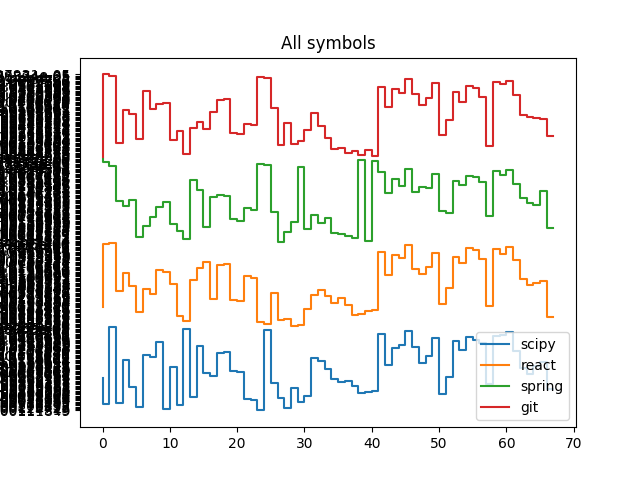

In [80]:
plt.step(range(len(scipy_stats.freq)),scipy_stats.freq,label='scipy')
plt.step(range(len(scipy_stats.freq)),react_stats.freq,label='react')
plt.step(range(len(scipy_stats.freq)),spring_stats.freq,label='spring')
plt.step(range(len(scipy_stats.freq)),git_stats.freq,label='git')
plt.title("All symbols")
plt.legend()

In [46]:
symbols[:32]

['`',
 '^',
 '~',
 '<',
 '=',
 '>',
 '|',
 '_',
 '-',
 ',',
 ';',
 ':',
 '!',
 '?',
 '/',
 '.',
 "'",
 '"',
 '(',
 ')',
 '[',
 ']',
 '{',
 '}',
 '@',
 '$',
 '*',
 '\\',
 '&',
 '#',
 '%',
 '+']

<IPython.core.display.Javascript object>


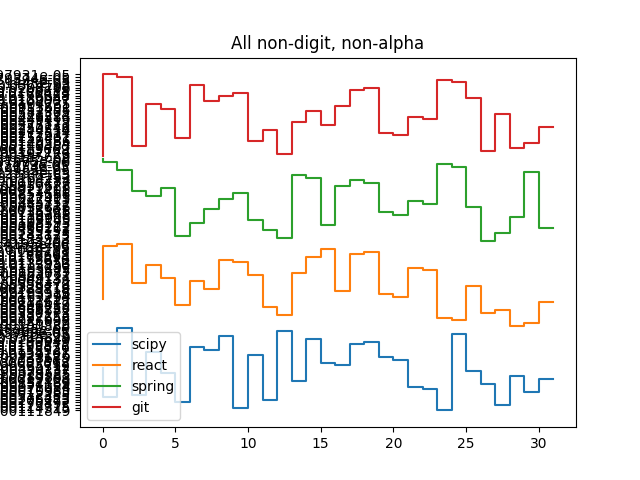

In [48]:
plt.step(range(non_alpha_len),scipy_stats.freq[:non_alpha_len],label='scipy')
plt.step(range(non_alpha_len),react_stats.freq[:non_alpha_len],label='react')
plt.step(range(non_alpha_len),spring_stats.freq[:non_alpha_len],label='spring')
plt.step(range(non_alpha_len),git_stats.freq[:non_alpha_len],label='git')
plt.title("All non-digit, non-alpha")
plt.legend()

In [107]:
s = pd.DataFrame([
    react_stats.sorted_non_alphas,
    scipy_stats.sorted_non_alphas,
    spring_stats.sorted_non_alphas,
    git_stats.sorted_non_alphas
])

In [108]:
with pd.option_context('display.max_rows', None, 'display.max_columns', 32):
    print(s)

  0  1  2  3  4  5  6  7  8  9  10 11 12 13 14 15 16 17 18 19 20 21 22 23 24  \
0  ~  ^  #  %  $  @  ?  \  &  !  |  +  `  ]  [  "  -  *  <  _  >  :  /  }  {   
1  $  ?  ~  @  ;  &  |  !  ^  <  %  }  {  \  /  +  #  >  *  `  "  '  ]  [  :   
2  ^  `  %  ~  $  @  \  ?  |  &  !  +  '  _  :  #  ]  [  -  *  }  {  ,  =  ;   
3  $  @  ~  ^  `  ?  \  #  <  %  :  |  ]  [  !  +  '  /  }  {  &  .  >  "  =   

  25 26 27 28 29 30 31  
0  =  ;  ,  .  (  )  '  
1  =  -  _  (  )  .  ,  
2  <  >  "  )  (  .  /  
3  -  *  ,  ;  (  )  _  


<IPython.core.display.Javascript object>


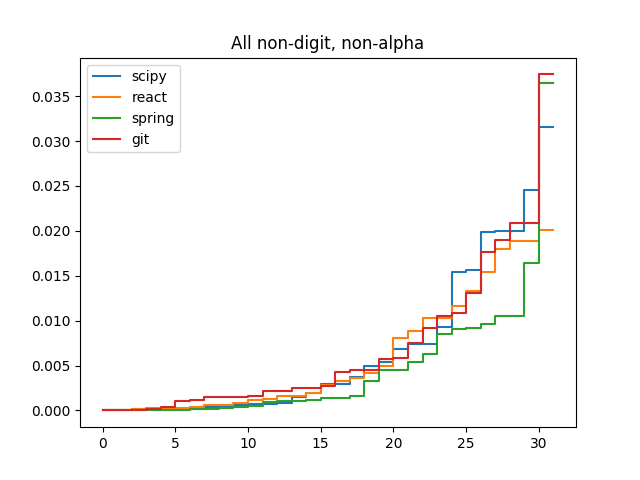

In [83]:
plt.step(range(SymbStat.non_alpha_len),scipy_stats.sorted_non_alphas_freq,label='scipy')
plt.step(range(SymbStat.non_alpha_len),react_stats.sorted_non_alphas_freq,label='react')
plt.step(range(SymbStat.non_alpha_len),spring_stats.sorted_non_alphas_freq,label='spring')
plt.step(range(SymbStat.non_alpha_len),git_stats.sorted_non_alphas_freq,label='git')
plt.title("All non-digit, non-alpha")
plt.legend()

In [103]:
symb="'"
[react_stats.sorted_position(symb),
scipy_stats.sorted_position(symb),
git_stats.sorted_position(symb),
spring_stats.sorted_position(symb)]

[31, 21, 16, 12]

In [126]:
non_dvorak = symbols.difference({"'", ".", ",", "/", "-", "=", "\\", "(", "[", ";"})

In [127]:
len(non_dvorak)

22

In [128]:
print(non_dvorak)

{')', '^', ':', '#', '_', '}', '!', '%', '@', '{', ']', '+', '"', '~', '*', '`', '&', '$', '?', '|', '>', '<'}
